In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_and_test_csv.zip to train_and_test_csv.zip


In [2]:
!unzip /content/train_and_test_csv.zip

Archive:  /content/train_and_test_csv.zip
  inflating: test_mSzZ8RL.csv        
  inflating: train_s3TEQDk.csv       


In [25]:
import pandas as pd
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [26]:
df_train['Status'] = 'Train'
df_train = df_train.drop(['ID'],axis = 1)
df_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status
0,Female,73,RG268,Other,X3,43,No,1045696,No,0,Train
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Train
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Train
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Train
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Train


In [27]:
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [28]:
df_test['Status'] = 'Test'
ID = df_test['ID']
df_test = df_test.drop(['ID'],axis = 1)
df_test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Status
0,Male,29,RG254,Other,X1,25,Yes,742366,No,Test
1,Male,43,RG268,Other,X2,49,NaN,925537,No,Test
2,Male,31,RG270,Salaried,X1,14,No,215949,No,Test
3,Male,29,RG272,Other,X1,33,No,868070,No,Test
4,Female,29,RG270,Other,X1,19,No,657087,No,Test


In [ ]:
print(df_train.shape)
print(df_test.shape)

(245725, 11)
(105312, 10)


In [29]:
df_total= pd.concat([df_train,df_test],ignore_index = True)
df_total.shape

(351037, 11)

In [30]:
# imputing the missing values using forward fill. and also maitaing the ration of the two classes
df_total['Credit_Product'] = df_total['Credit_Product'].fillna(method='ffill')

In [31]:
# class ratio is intact even after imputation
df_total['Credit_Product'].value_counts(normalize=True)

No     0.665944
Yes    0.334056
Name: Credit_Product, dtype: float64

In [32]:
gender_map = {'Male':0, 'Female': 1}
df_total['Gender'] = df_total['Gender'].map(gender_map)
df_total.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status
0,1,73,RG268,Other,X3,43,No,1045696,No,0.0,Train
1,1,30,RG277,Salaried,X1,32,No,581988,No,0.0,Train
2,1,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,Train
3,0,34,RG270,Salaried,X1,19,No,470454,No,0.0,Train
4,1,30,RG282,Salaried,X1,33,No,886787,No,0.0,Train


In [33]:
df_total = pd.get_dummies(df_total,prefix = ['Region_Code'],columns=['Region_Code'],drop_first = True)
df_total.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284
0,1,73,Other,X3,43,No,1045696,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,30,Salaried,X1,32,No,581988,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,56,Self_Employed,X3,26,No,1484315,Yes,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,34,Salaried,X1,19,No,470454,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30,Salaried,X1,33,No,886787,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df_total = pd.get_dummies(df_total,prefix = ['Occupation'],columns=['Occupation'],drop_first = True)
df_total.head()

,Gender,Age,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed
0,1,73,X3,43,No,1045696,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,30,X1,32,No,581988,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,1,56,X3,26,No,1484315,Yes,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,34,X1,19,No,470454,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,30,X1,33,No,886787,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [35]:
df_total = pd.get_dummies(df_total,prefix = ['Channel_Code'],columns=['Channel_Code'],drop_first = True)
df_total.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,No,1045696,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,30,32,No,581988,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,56,26,No,1484315,Yes,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,34,19,No,470454,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,30,33,No,886787,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [36]:
credit_Product_map = {'No':0, 'Yes': 1}
df_total['Credit_Product'] = df_total['Credit_Product'].map(credit_Product_map)
df_total.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,0,1045696,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,30,32,0,581988,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,56,26,0,1484315,Yes,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,34,19,0,470454,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,30,33,0,886787,No,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [37]:
is_Active_map = {'No':0, 'Yes': 1}
df_total['Is_Active'] = df_total['Is_Active'].map(is_Active_map)
df_total.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,0,1045696,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,30,32,0,581988,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,56,26,0,1484315,1,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,34,19,0,470454,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,30,33,0,886787,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_total[df_total['Is_Lead'] == 1.0]

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
6,0,62,20,0,1056750,1,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
15,0,33,69,0,517063,1,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
16,1,46,97,1,2282502,0,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
17,1,59,15,1,2384692,0,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
20,0,44,19,1,1001650,0,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245697,0,43,50,0,551203,1,1.0,Train,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
245699,0,53,19,1,1141825,1,1.0,Train,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
245709,0,36,15,1,608110,1,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
245713,1,41,13,1,898170,1,1.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


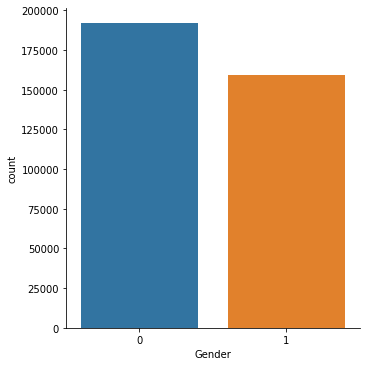

In [ ]:
sns.catplot('Gender',data=df_total,kind='count')
# 'Male':0, 'Female': 1

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


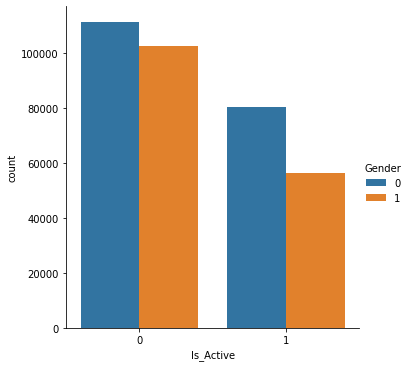

In [ ]:
sns.factorplot('Is_Active',data=df_total,hue='Gender',kind='count')

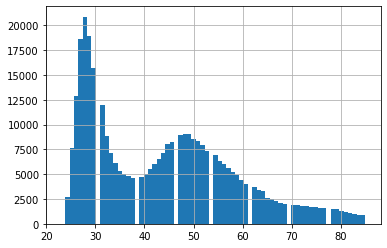

In [ ]:
df_total['Age'].hist(bins=70)

In [16]:
df_total.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Status,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,0,1045696,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,30,32,0,581988,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,56,26,0,1484315,1,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,34,19,0,470454,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,30,33,0,886787,0,0.0,Train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [38]:
df_train = df_total[df_total['Status'] == 'Train']
df_train = df_train.drop(['Status'],axis = 1)
df_train.shape
df_train.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,73,43,0,1045696,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,30,32,0,581988,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,56,26,0,1484315,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,34,19,0,470454,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,30,33,0,886787,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [39]:
df_test = df_total[df_total['Status'] == 'Test']
df_test = df_test.drop(['Status'],axis = 1)
df_test.shape
df_test.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
245725,0,29,25,1,742366,0,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
245726,0,43,49,1,925537,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
245727,0,31,14,0,215949,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
245728,0,29,33,0,868070,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
245729,1,29,19,0,657087,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [41]:
X = df_train.drop(['Is_Lead'],axis = 1)
y = df_train['Is_Lead']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

# RandomForestClassifier - roc_auc score: 0.630895

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
best_rf_random = rf_random.best_estimator_

In [ ]:
predictions = best_rf_random.predict(X_val)

In [ ]:
predictions_probab = best_rf_random.predict_proba(X_val)[:,-1]
predictions_probab

array([0.24280176, 0.35741397, 0.36403351, ..., 0.21027817, 0.23837507,
       0.18192341])

In [ ]:
threshold = 0.5
y_pred = [1 if i>= threshold else 0 for i in predictions_probab]

In [ ]:
from sklearn.metrics import confusion_matrix,roc_auc_score

conf_matrix = pd.DataFrame(confusion_matrix(predictions, y_val), 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,44374,9797
Actual Positive,2678,4583


In [ ]:
roc_auc_score(y_val, predictions) # predictions

0.6308953920362959

In [ ]:
roc_auc_score(y_val, y_pred) # predictions_probab

0.6308953920362959

# LGBMClassifier without tuning -  roc_auc score:0.8006

In [45]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(lgb, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
n_scores

array([0.79816582, 0.79842139, 0.79834585, 0.80088096, 0.80023755,
       0.80323519, 0.80015861, 0.80008797, 0.79879252, 0.80588054,
       0.80213985, 0.79535631, 0.80223817, 0.79612102, 0.80494602,
       0.80132675, 0.80470318, 0.80056294, 0.79982401, 0.79662412,
       0.79588709, 0.80257373, 0.79943009, 0.79862572, 0.79837521,
       0.79812431, 0.80051523, 0.80366845, 0.80555471, 0.80053376])

In [ ]:
lgb.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predictions_probab = lgb.predict_proba(X_val)[:,-1]
predictions_probab

array([0.30567182, 0.38453739, 0.40650203, ..., 0.11262934, 0.31762687,
       0.2039617 ])

In [ ]:
roc_auc_score(y_val, predictions_probab)

0.8006557543768047

In [ ]:
predictions_probab = lgb.predict_proba(X_val)[:,-1]
predictions_probab

In [ ]:
X_val.shape,X_test.shape

((61432, 46), (105312, 46))

In [78]:
X_test = df_test.drop(['Is_Lead'],axis = 1)
X_test.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
245725,0,29,25,1,742366,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
245726,0,43,49,1,925537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
245727,0,31,14,0,215949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
245728,0,29,33,0,868070,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
245729,1,29,19,0,657087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
predictions_probab = lgb.predict_proba(X_test)[:,-1]
predictions_probab

array([0.04498386, 0.26581867, 0.06378655, ..., 0.36200268, 0.42407622,
       0.06659654])

In [ ]:
test_df = pd.read_csv('test_mSzZ8RL.csv')
ID = test_df['ID']

output = pd.DataFrame({'ID': ID, 'Is_Lead': predictions_probab})
output.to_csv('my_submission6.csv',index = False)

# LGBMClassifier with tuning (Highest score) - roc_auc score: 0.80078

In [47]:
def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [50]:
import lightgbm as lgb

    params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_val,y_val)],
            'eval_names': ['valid'],
            'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}
params

{'callbacks': [<function lightgbm.callback.reset_parameter.<locals>._callback>],
 'categorical_feature': 'auto',
 'early_stopping_rounds': 30,
 'eval_metric': 'auc',
 'eval_names': ['valid'],
 'eval_set': [(        Gender  Age  Vintage  ...  Channel_Code_X2  Channel_Code_X3  Channel_Code_X4
   165688       1   48       80  ...                0                1                0
   40238        0   41       20  ...                1                0                0
   36081        0   43       63  ...                0                0                0
   22743        1   45       31  ...                0                0                0
   136854       0   63      103  ...                1                0                0
   ...        ...  ...      ...  ...              ...              ...              ...
   27396        1   73       27  ...                1                0                0
   52213        0   58       85  ...                0                1                0
   1

In [53]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import numpy as np
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

print(param_test)

{'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35ca311310>, 'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35ca311290>, 'min_child_weight': [1e-05, 0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0], 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35ca304cd0>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f35ca311550>, 'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10, 50, 100], 'reg_lambda': [0, 0.1, 1, 5, 10, 20, 50, 100]}


In [54]:
import lightgbm as lgb

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)

n_HP_points_to_test = 10

clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=-1, n_estimators=5000)

gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=cv,
    refit=True,
    random_state=314,
    verbose=True)

In [56]:
gs.fit(X_train, y_train, **params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.798995
[200]	valid's auc: 0.799456
[300]	valid's auc: 0.799571
[400]	valid's auc: 0.799638
[500]	valid's auc: 0.799662
[600]	valid's auc: 0.799675
[700]	valid's auc: 0.799688
[800]	valid's auc: 0.799702
[900]	valid's auc: 0.799717
[1000]	valid's auc: 0.799722
[1100]	valid's auc: 0.799726
Early stopping, best iteration is:
[1093]	valid's auc: 0.799726
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.79904
[200]	valid's auc: 0.799689
[300]	valid's auc: 0.799877
[400]	valid's auc: 0.799939
[500]	valid's auc: 0.799967
[600]	valid's auc: 0.79998
[700]	valid's auc: 0.799991
[800]	valid's auc: 0.800003
[900]	valid's auc: 0.800026
[1000]	valid's auc: 0.800037
[1100]	valid's auc: 0.800052
[1200]	valid's auc: 0.800061
[1300]	valid's auc: 0.800075
[1400]	valid's auc: 0.80009
[1500]	valid's auc: 0.800102
[1600]	valid's auc: 0.80011
[1700]	valid's auc: 0.80012
[1800]	valid's auc: 0.8

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 69.7min finished


Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.800784
[200]	valid's auc: 0.800942
Early stopping, best iteration is:
[204]	valid's auc: 0.800948
Best score reached: 0.8002973682619764 with params: {'colsample_bytree': 0.8754369812451743, 'min_child_samples': 372, 'min_child_weight': 10.0, 'num_leaves': 44, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.568664015245299} 


In [ ]:
opt_parameters = gs.best_params_

In [57]:
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Best score reached: 0.8002973682619764 with params: {'colsample_bytree': 0.8754369812451743, 'min_child_samples': 372, 'min_child_weight': 10.0, 'num_leaves': 44, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.568664015245299} 


In [58]:
opt_parameters = gs.best_params_
opt_parameters

{'colsample_bytree': 0.8754369812451743,
 'min_child_samples': 372,
 'min_child_weight': 10.0,
 'num_leaves': 44,
 'reg_alpha': 1,
 'reg_lambda': 0,
 'subsample': 0.568664015245299}

In [72]:
clf_final = lgb.LGBMClassifier(**opt_parameters) #direct on optimal parameters
clf_final

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8754369812451743, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=372,
               min_child_weight=10.0, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=44, objective=None, random_state=None,
               reg_alpha=1, reg_lambda=0, silent=True,
               subsample=0.568664015245299, subsample_for_bin=200000,
               subsample_freq=0)

In [73]:
clf_final.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
               colsample_bytree=0.8754369812451743, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=372,
               min_child_weight=10.0, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=44, objective=None, random_state=None,
               reg_alpha=1, reg_lambda=0, silent=True,
               subsample=0.568664015245299, subsample_for_bin=200000,
               subsample_freq=0)

In [74]:
predictions_probab = clf_final.predict_proba(X_val)[:,-1]

In [75]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, predictions_probab)

0.800785812743265

In [79]:
predictions_probab_test = clf_final.predict_proba(X_test)[:,-1]
predictions_probab_test

array([0.04890275, 0.25450824, 0.06978894, ..., 0.29709946, 0.43294669,
       0.06719057])

In [81]:
test_df = pd.read_csv('test_mSzZ8RL.csv')
ID = test_df['ID']

output = pd.DataFrame({'ID': ID, 'Is_Lead': predictions_probab_test})
output.to_csv('my_submission7.csv',index = False) # highest score